In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hydroeval as he
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Set the plot style for all our new plots
plt.style.use('seaborn-v0_8-whitegrid')
print("--- All libraries imported. ---")


# This is the single, clean file we created in the last notebook
df = pd.read_csv('../data/processed/model_ready_data.csv', index_col='date', parse_dates=True)

print("✅ Model-ready data loaded successfully.")
df.info()

y = df['target_discharge_t+7']
X = df.drop(columns=['discharge', 'target_discharge_t+7'])

print("\n✅ Features (X) and Target (y) are defined.")

# We split our data chronologically, as we determined in our first run.
split_date = '2005-01-01'
X_train = X.loc[X.index < split_date]
y_train = y.loc[y.index < split_date]
X_test = X.loc[X.index >= split_date]
y_test = y.loc[y.index >= split_date]

print(f"\n✅ Data successfully split.")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

--- All libraries imported. ---
✅ Model-ready data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9519 entries, 1981-01-30 to 2007-02-21
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   discharge             9519 non-null   float64
 1   rainfall_mm           9519 non-null   float64
 2   soi_index             9519 non-null   float64
 3   discharge_lag_1       9519 non-null   float64
 4   rainfall_lag_1        9519 non-null   float64
 5   discharge_lag_2       9519 non-null   float64
 6   rainfall_lag_2        9519 non-null   float64
 7   discharge_lag_3       9519 non-null   float64
 8   rainfall_lag_3        9519 non-null   float64
 9   discharge_lag_4       9519 non-null   float64
 10  rainfall_lag_4        9519 non-null   float64
 11  discharge_lag_5       9519 non-null   float64
 12  rainfall_lag_5        9519 non-null   float64
 13  discharge_lag_6       9519 non-nu

--- Training MLR Model ---
✅ MLR Training complete!

--- Evaluating MLR Model ---
--- MLR Model Performance Metrics ---
Root Mean Square Error (RMSE): 96.93 m³/s
Mean Absolute Error (MAE): 51.54 m³/s
R-squared (R²): 0.85
Nash-Sutcliffe Efficiency (NSE): 0.85

--- Plotting MLR Results ---


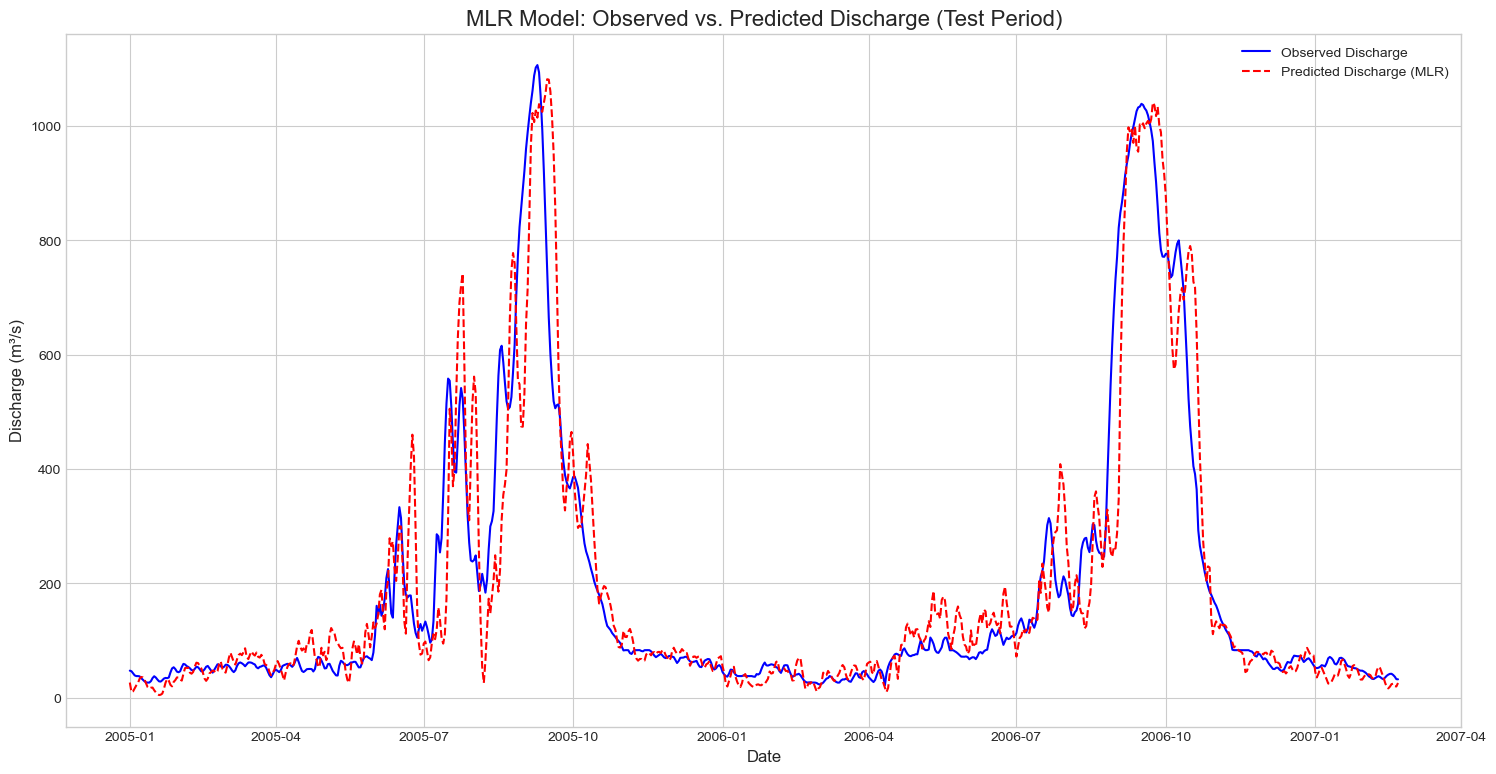

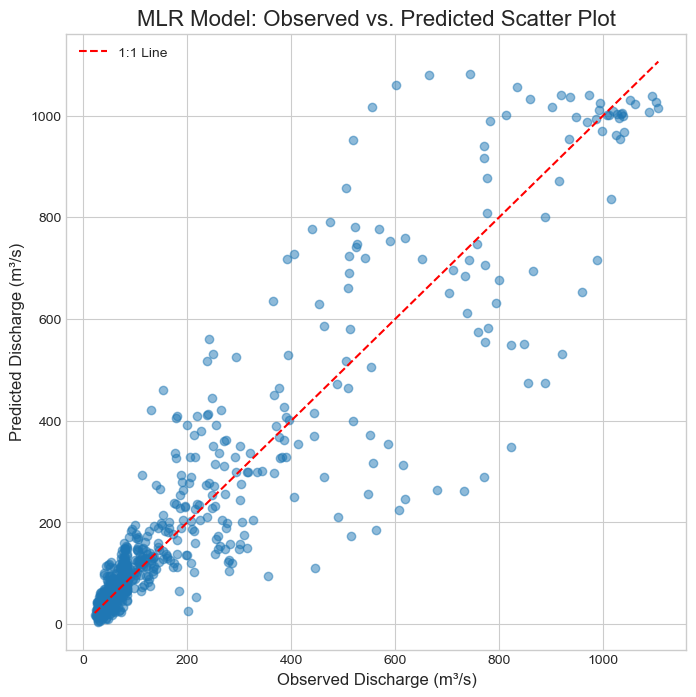

In [3]:

print("--- Training MLR Model ---")
# 1. Initialize and train the model
model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)
print("✅ MLR Training complete!")

# 2. Make predictions on the unseen test data
y_pred_mlr = model_mlr.predict(X_test)

# 3. Store results in a DataFrame for easy comparison
results_mlr = pd.DataFrame({
    'Observed': y_test,
    'Predicted_MLR': y_pred_mlr
}, index=y_test.index) # Use the test index for correct dates


print("\n--- Evaluating MLR Model ---")
# Calculate the metrics
rmse_mlr = np.sqrt(mean_squared_error(results_mlr['Observed'], results_mlr['Predicted_MLR']))
mae_mlr = mean_absolute_error(results_mlr['Observed'], results_mlr['Predicted_MLR'])
r2_mlr = r2_score(results_mlr['Observed'], results_mlr['Predicted_MLR'])
nse_mlr = he.evaluator(he.nse, results_mlr['Predicted_MLR'], results_mlr['Observed'])[0]

# Print the results
print("--- MLR Model Performance Metrics ---")
print(f"Root Mean Square Error (RMSE): {rmse_mlr:.2f} m³/s")
print(f"Mean Absolute Error (MAE): {mae_mlr:.2f} m³/s")
print(f"R-squared (R²): {r2_mlr:.2f}")
print(f"Nash-Sutcliffe Efficiency (NSE): {nse_mlr:.2f}")

print("\n--- Plotting MLR Results ---")

# --- Plot 1: Time Series Comparison ---
plt.figure(figsize=(18, 9))
plt.plot(results_mlr.index, results_mlr['Observed'], label='Observed Discharge', color='blue')
plt.plot(results_mlr.index, results_mlr['Predicted_MLR'], label='Predicted Discharge (MLR)', color='red', linestyle='--')
plt.title('MLR Model: Observed vs. Predicted Discharge (Test Period)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.savefig('../figures/mlr_timeseries_plot.png', dpi=300) # Save the figure
plt.show()

# --- Plot 2: Scatter Plot ---
plt.figure(figsize=(8, 8))
plt.scatter(results_mlr['Observed'], results_mlr['Predicted_MLR'], alpha=0.5)
plt.plot([min(results_mlr['Observed']), max(results_mlr['Observed'])], 
         [min(results_mlr['Observed']), max(results_mlr['Observed'])], 
         color='red', linestyle='--', label='1:1 Line')
plt.title('MLR Model: Observed vs. Predicted Scatter Plot', fontsize=16)
plt.xlabel('Observed Discharge (m³/s)', fontsize=12)
plt.ylabel('Predicted Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('../figures/mlr_scatter_plot.png', dpi=300) # Save the figure
plt.show()


--- Starting ARIMA Model ---
ARIMA training samples: 8737, Testing samples: 782
Training the ARIMA model... This may take a few minutes.


C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


✅ ARIMA Training complete!
Making forecasts for the test period...

--- Evaluating ARIMA Model ---
--- ARIMA Model Performance Metrics ---
Root Mean Square Error (RMSE): 295.55 m³/s
Mean Absolute Error (MAE): 160.59 m³/s
R-squared (R²): -0.42
Nash-Sutcliffe Efficiency (NSE): -0.42

--- MLR Baseline (for comparison) ---
MLR NSE: 0.85

--- Plotting ARIMA Results ---


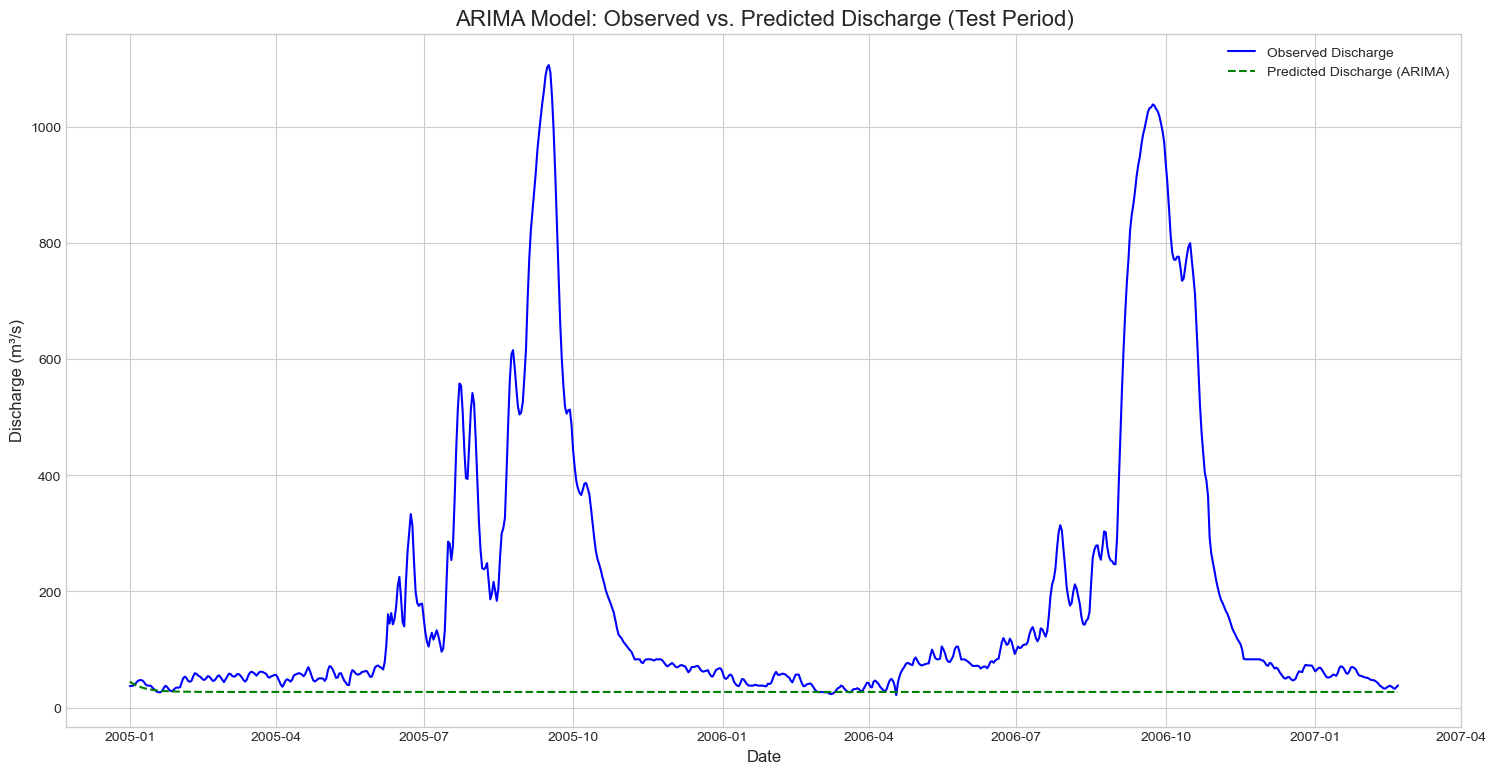

In [4]:

print("\n--- Starting ARIMA Model ---")

# 1. Prepare the data
# For a simple ARIMA, we only need the target time series itself.
ts_data = df['discharge']

# 2. Split the data
# We use the *exact same* split date for a fair comparison.
split_date = '2005-01-01'
train_data = ts_data.loc[ts_data.index < split_date]
test_data = ts_data.loc[ts_data.index >= split_date]
print(f"ARIMA training samples: {len(train_data)}, Testing samples: {len(test_data)}")

# 3. Initialize and train the model
# We'll use (p=5, d=1, q=1) as a strong, common baseline.
# p=5: Use the last 5 days of "memory" (AutoRegressive)
# d=1: Account for trends by taking the first difference (Integrated)
# q=1: Use the last prediction's error to correct itself (Moving Average)
model_arima = ARIMA(train_data, order=(5, 1, 1))

print("Training the ARIMA model... This may take a few minutes.")
arima_results = model_arima.fit()
print("✅ ARIMA Training complete!")

# 4. Make predictions (forecasts)
print("Making forecasts for the test period...")
# Forecast for the entire length of the test set
y_pred_arima = arima_results.forecast(steps=len(test_data))

# 5. Store results
results_arima = pd.DataFrame({
    'Observed': test_data,
    'Predicted_ARIMA': y_pred_arima
})

print("\n--- Evaluating ARIMA Model ---")
rmse_arima = np.sqrt(mean_squared_error(results_arima['Observed'], results_arima['Predicted_ARIMA']))
mae_arima = mean_absolute_error(results_arima['Observed'], results_arima['Predicted_ARIMA'])
r2_arima = r2_score(results_arima['Observed'], results_arima['Predicted_ARIMA'])
nse_arima = he.evaluator(he.nse, results_arima['Predicted_ARIMA'], results_arima['Observed'])[0]

# Print the results
print("--- ARIMA Model Performance Metrics ---")
print(f"Root Mean Square Error (RMSE): {rmse_arima:.2f} m³/s")
print(f"Mean Absolute Error (MAE): {mae_arima:.2f} m³/s")
print(f"R-squared (R²): {r2_arima:.2f}")
print(f"Nash-Sutcliffe Efficiency (NSE): {nse_arima:.2f}")

print("\n--- MLR Baseline (for comparison) ---")
print(f"MLR NSE: {nse_mlr:.2f}") # This variable was saved from our previous cell

print("\n--- Plotting ARIMA Results ---")
plt.figure(figsize=(18, 9))
plt.plot(results_arima.index, results_arima['Observed'], label='Observed Discharge', color='blue')
plt.plot(results_arima.index, results_arima['Predicted_ARIMA'], label='Predicted Discharge (ARIMA)', color='green', linestyle='--')
plt.title('ARIMA Model: Observed vs. Predicted Discharge (Test Period)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.savefig('../figures/arima_timeseries_plot.png', dpi=300) # Save the figure
plt.show()